In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [3]:
telecom_cust = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
telecom_cust.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
telecom_cust.shape

(7043, 21)

In [7]:
telecom_cust.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
telecom_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
# Converting Total Charges to a numerical data type.
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')
telecom_cust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
#Removing missing values 
telecom_cust.dropna(inplace = True)
#Remove customer IDs from the data set

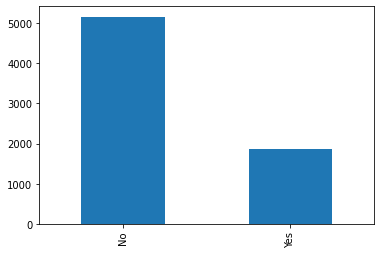

In [12]:
telecom_cust.Churn.value_counts().plot.bar()

In [15]:
df_new=telecom_cust[["tenure", "OnlineSecurity", "Contract", "TotalCharges", "InternetService", "TechSupport", "MonthlyCharges", "Churn" ]]

In [16]:
df_new.head()

,tenure,OnlineSecurity,Contract,TotalCharges,InternetService,TechSupport,MonthlyCharges,Churn
0,1,No,Month-to-month,29.85,DSL,No,29.85,No
1,34,Yes,One year,1889.50,DSL,No,56.95,No
2,2,Yes,Month-to-month,108.15,DSL,No,53.85,Yes
3,45,Yes,One year,1840.75,DSL,Yes,42.30,No
4,2,No,Month-to-month,151.65,Fiber optic,No,70.70,Yes


In [17]:
df_new.TechSupport.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [18]:
df_new.describe()

,tenure,TotalCharges,MonthlyCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,2283.300441,64.798208
std,24.545260,2266.771362,30.085974
min,1.000000,18.800000,18.250000
25%,9.000000,401.450000,35.587500
50%,29.000000,1397.475000,70.350000
75%,55.000000,3794.737500,89.862500
max,72.000000,8684.800000,118.750000


In [19]:
df_new.isnull().sum().any()

False

In [20]:
df_new['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df_new['Churn'].replace(to_replace='No',  value=0, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4581: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [21]:
df_new.head()

,tenure,OnlineSecurity,Contract,TotalCharges,InternetService,TechSupport,MonthlyCharges,Churn
0,1,No,Month-to-month,29.85,DSL,No,29.85,0
1,34,Yes,One year,1889.50,DSL,No,56.95,0
2,2,Yes,Month-to-month,108.15,DSL,No,53.85,1
3,45,Yes,One year,1840.75,DSL,Yes,42.30,0
4,2,No,Month-to-month,151.65,Fiber optic,No,70.70,1


In [22]:
df_new_2 = pd.get_dummies(df_new)
df_new_2.head()

,tenure,TotalCharges,MonthlyCharges,Churn,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
0,1,29.85,29.85,0,1,0,0,1,0,0,1,0,0,1,0,0
1,34,1889.50,56.95,0,0,0,1,0,1,0,1,0,0,1,0,0
2,2,108.15,53.85,1,0,0,1,1,0,0,1,0,0,1,0,0
3,45,1840.75,42.30,0,0,0,1,0,1,0,1,0,0,0,0,1
4,2,151.65,70.70,1,1,0,0,1,0,0,0,1,0,1,0,0


In [23]:
df_new_2.shape

(7032, 16)

In [24]:
y = df_new_2['Churn'].values
X = df_new_2.drop(columns = ['Churn'])

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [26]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
from sklearn import metrics
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8061611374407583


In [27]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,prediction_test))  
print(classification_report(y_test,prediction_test))

[[1441  139]
 [ 270  260]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1580
           1       0.65      0.49      0.56       530

    accuracy                           0.81      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.79      0.81      0.80      2110



In [28]:
pip install smote

In [29]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [30]:
sm = SMOTE()
x_train_s, y_train_s = sm.fit_sample(X_train, y_train.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [31]:
print("Transaction Number x_train dataset: ", X_train.shape)
print("Transaction Number y_train dataset: ", y_train.shape)
print("Transaction Number x_test dataset: ", X_test.shape)
print("Transaction Number y_test dataset: ", y_test.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Transaction Number x_train dataset:  (4922, 15)
Transaction Number y_train dataset:  (4922,)
Transaction Number x_test dataset:  (2110, 15)
Transaction Number y_test dataset:  (2110,)
Before OverSampling, counts of label '1': 1339
Before OverSampling, counts of label '0': 3583 



In [32]:
print('After OverSampling, the shape of train_x: {}'.format(x_train_s.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_s.shape))

print("After OverSampling, counts of label '1', %: {}".format(sum(y_train_s==1)/len(y_train_s)*100.0,2))
print("After OverSampling, counts of label '0', %: {}".format(sum(y_train_s==0)/len(y_train_s)*100.0,2))

#sns.countplot(x=y_train_s, data=df, palette='CMRmap')

After OverSampling, the shape of train_x: (7166, 15)
After OverSampling, the shape of train_y: (7166,) 

After OverSampling, counts of label '1', %: 50.0
After OverSampling, counts of label '0', %: 50.0


In [33]:
X_smote = pd.DataFrame(x_train_s)
y_smote = pd.DataFrame(y_train_s)

# define training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_smote, y_smote, test_size=0.2, random_state=0)

In [35]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model.fit(X_train, y_train)

# Make predictions
from sklearn import metrics
prediction_test = model.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.8410041841004184


In [36]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,prediction_test))  
print(classification_report(y_test,prediction_test))

[[584 119]
 [109 622]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       703
           1       0.84      0.85      0.85       731

    accuracy                           0.84      1434
   macro avg       0.84      0.84      0.84      1434
weighted avg       0.84      0.84      0.84      1434



In [37]:
import pickle
pickle.dump(model, open("smote_rf_model", 'wb'))  

In [38]:
my_dict = {"tenure" :2, 
        "OnlineSecurity":1, 
        "Contract": "Month-to-month", 
        "TotalCharges": 108 , 
        "InternetService": "DSL", 
        "TechSupport": "No", 
        "MonthlyCharges":50
}

In [39]:
pickle.dump(list(X.columns), open('model_features.pkl','wb'))

In [40]:
df = pd.DataFrame.from_dict([my_dict], orient='columns')

In [41]:
df.head()

,tenure,OnlineSecurity,Contract,TotalCharges,InternetService,TechSupport,MonthlyCharges
0,2,1,Month-to-month,108,DSL,No,50


In [42]:
features = pickle.load(open('model_features.pkl', 'rb'))

In [43]:
print(features)

['tenure', 'TotalCharges', 'MonthlyCharges', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes']


In [44]:
df = pd.get_dummies(df).reindex(columns=features, fill_value=0)

In [45]:
df.head()

,tenure,TotalCharges,MonthlyCharges,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
0,2,108,50,0,0,0,1,0,0,1,0,0,1,0,0


In [47]:
prediction = model.predict(df)

In [48]:
print(prediction)

[1]


In [49]:
prediction = int(round(model.predict_proba(X)[0][1], 2)*100)

In [50]:
print("%", prediction)

% 77
